<a href="https://colab.research.google.com/github/rojikaru/rozrakh/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework

## Package installing

In [ ]:
!pip install dask-ml[complete] optuna hcuppy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
  Attempting uninstall: dask
    Found existing installation: dask 2024.12.1
    Uninstalling dask-2024.12.1:
      Successfully uninstalled dask-2024.12.1
  Attempting uninstall: distributed
    Found existin

In [ ]:
!pip install --extra-index-url=https://pypi.nvidia.com/ "cudf-cu12==25.4.*" "dask-cudf-cu12==25.4.*" "cuml-cu12==25.4.*" "cugraph-cu12==25.4.*" "nx-cugraph-cu12==25.4.*" "cuspatial-cu12==25.4.*" "cuproj-cu12==25.4.*" "cuxfilter-cu12==25.4.*" "cucim-cu12==25.4.*" "pylibraft-cu12==25.4.*" "raft-dask-cu12==25.4.*" "cuvs-cu12==25.4.*" "nx-cugraph-cu12==25.4.*"

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 192.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 190.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 222.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 152.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 219.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 213.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 212.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 855.3/855.3 kB 206.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72

## Data loading

In [ ]:
import os
import gc
import numpy as np
import pandas as pd
import dask.dataframe as dd
from hcuppy.elixhauser import ElixhauserEngine
from tqdm import tqdm


def get_mimic_iv_31(
    data_path='datasets',
    cache_path='datasets/cache',
    chunk_size='100MB',
    time_delta_days=365
):
    os.makedirs(cache_path, exist_ok=True)
    cache_file = os.path.join(cache_path, 'mimic_iv_31_compact.parquet')

    if os.path.exists(cache_file):
        return dd.read_parquet(cache_file).astype('float32')

    # 1. Load and process admissions with new features
    adm_target_types = [
        'DIRECT EMER.',
        'ELECTIVE',
        'EU OBSERVATION',
        'EW EMER.',
        'OBSERVATION ADMIT',
        'URGENT',
        'SURGICAL SAME DAY ADMISSION',
    ]
    adm_target_cols = [f'admission_type_{t}' for t in adm_target_types]

    adm_cache = os.path.join(cache_path, 'adm_compact.parquet')
    if os.path.exists(adm_cache):
        adm = dd.read_parquet(adm_cache)
    else:
        # Load admissions and patient data
        adm = dd.read_csv(
            os.path.join(data_path, 'hosp', 'admissions.csv.gz'),
            compression='gzip',
            usecols=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type'],
            parse_dates=['admittime', 'dischtime'],
            dtype={'subject_id': 'int32', 'hadm_id': 'int32'},
            blocksize=chunk_size,
        )

        # Merge patient data for age calculation
        patients = dd.read_csv(
            os.path.join(data_path, 'hosp', 'patients.csv.gz'),
            compression='gzip',
            usecols=['subject_id', 'anchor_year', 'anchor_age'],
            dtype={'subject_id': 'int32', 'anchor_year': 'int16', 'anchor_age': 'int8'},
            blocksize=chunk_size,
        )
        adm = adm.merge(patients, on='subject_id', how='left')

        # Calculate age features
        adm['admittime_year'] = adm['admittime'].dt.year
        adm['age_at_admission'] = adm['anchor_age'] + (adm['admittime_year'] - adm['anchor_year'])
        adm['age_65_plus'] = (adm['age_at_admission'] >= 65).astype('int8')
        adm = adm.drop(['anchor_year', 'anchor_age', 'admittime_year', 'age_at_admission'], axis=1)

        # Calculate prior admissions count
        adm = adm.sort_values(['subject_id', 'admittime'])
        adm['prior_admissions'] = adm.groupby('subject_id').cumcount()

        # Filter admission types after calculating features
        adm['admission_type'] = adm['admission_type'].astype('category')
        adm = adm[adm['admission_type'].isin(adm_target_types)]

        # Create dummies
        adm = dd.get_dummies(adm.categorize(), columns=['admission_type'])
        adm[adm_target_cols] = adm[adm_target_cols].astype('int8')

        adm.to_parquet(adm_cache, overwrite=True)

    gc.collect()
    print('Loaded admissions with new features')

    # 2. Enhanced Elixhauser with chronic condition flag
    elix_cache = os.path.join(cache_path, 'elixhauser_compact.parquet')
    if os.path.exists(elix_cache):
        elix = dd.read_parquet(elix_cache)
    else:
        dx = dd.read_csv(
            os.path.join(data_path, 'hosp', 'diagnoses_icd.csv.gz'),
            compression='gzip',
            usecols=['hadm_id', 'icd_code'],
            dtype={'hadm_id': 'int32', 'icd_code': 'str'},
            blocksize=chunk_size,
        )
        dx['icd_code'] = dx['icd_code'].str.upper().str.replace('.', '', regex=False)

        def compute_elixhauser(partition):
            ee = ElixhauserEngine()
            results = []
            for hadm_id, group in partition.groupby('hadm_id'):
                icd_list = group['icd_code'].tolist()
                res = ee.get_elixhauser(icd_list)
                results.append({
                    'hadm_id': hadm_id,
                    'elix_readmit': res.get('rdmsn_scr', 0),
                    'elix_mortality': res.get('mrtlt_scr', 0),
                    'has_chronic': int(any(res['cmrbdt_lst']))
                })
            return pd.DataFrame(results)

        meta = pd.DataFrame({
            'hadm_id': pd.Series([], dtype='int32'),
            'elix_readmit': pd.Series([], dtype='float32'),
            'elix_mortality': pd.Series([], dtype='float32'),
            'has_chronic': pd.Series([], dtype='int8')
        })

        elix = dx.map_partitions(compute_elixhauser, meta=meta)
        elix.to_parquet(elix_cache, overwrite=True)
        del dx
        gc.collect()

    df = adm.merge(elix, on='hadm_id', how='left').fillna({'elix_readmit': 0, 'elix_mortality': 0, 'has_chronic': 0})
    print('Enhanced Elixhauser with chronic flag')

    # 3. Prescription counts
    rx_cache = os.path.join(cache_path, 'prescriptions_compact.parquet')
    if os.path.exists(rx_cache):
        rx = dd.read_parquet(rx_cache)
    else:
        rx = dd.read_csv(
            os.path.join(data_path, 'hosp', 'prescriptions.csv.gz'),
            compression='gzip',
            usecols=['hadm_id'],
            dtype={'hadm_id': 'int32'},
            blocksize=chunk_size,
        )
        rx = rx.groupby('hadm_id').size().reset_index().rename(columns={0: 'num_prescriptions'})
        rx.to_parquet(rx_cache, overwrite=True)

    df = df.merge(rx, on='hadm_id', how='left').fillna({'num_prescriptions': 0})
    df['num_prescriptions'] = df['num_prescriptions'].astype('int32')
    print('Added prescription counts')

    # 3. Key lab values (only the most predictive ones)
    print('Computing key lab values')
    lab_cache = os.path.join(cache_path, 'labs_compact.parquet')
    if os.path.exists(lab_cache):
        labs = pd.read_parquet(lab_cache)
    else:
        # Lab configuration: {itemid: (short_name, aggregation_functions)}
        lab_config = {
            50912: ('creatinine', ['max', 'last']), # Kidney dysfunction
            51222: ('hemoglobin', ['max', 'last']), # Anemia
            51002: ('troponin_i', ['max']),         # Myocardial injury indicator
            50813: ('lactate', ['max', 'last']),    # Tissue perfusion marker (critical in sepsis/shock)
            50862: ('albumin', ['mean']),           # Average albumin levels
            50983: ('sodium', ['mean']),            # Electrolyte imbalance (hyponatremia common in readmissions)
            50889: ('crp', ['max']),                # Only track max inflammation (C-reactive protein)
            51237: ('inr', ['max', 'last']),        # Coagulation status (warfarin management)
            50910: ('creatine_kinase', ['max'])     # Cardiac arrest
        }

        # Initialize storage dictionary
        lab_store = {itemid: [] for itemid in lab_config.keys()}

        reader = pd.read_csv(
            os.path.join(data_path, 'hosp', 'labevents.csv.gz'),
            compression='gzip',
            usecols=['hadm_id', 'itemid', 'valuenum'],
            dtype={'hadm_id': 'Int32', 'itemid': 'Int32', 'valuenum': 'Float64'},
            chunksize=10_000_000,
        )

        # Process chunks
        for chunk in tqdm(reader):
            chunk = chunk[chunk['itemid'].isin(lab_config.keys())]

            for itemid, (name, aggs) in lab_config.items():
                item_chunk = chunk[chunk['itemid'] == itemid]
                if not item_chunk.empty:
                    agg_df = item_chunk.groupby('hadm_id')['valuenum'].agg(aggs)
                    lab_store[itemid].append(agg_df)
            gc.collect()

        # Process and merge all labs
        dfs = []
        for itemid, (name, aggs) in lab_config.items():
            if lab_store[itemid]:
                combined = pd.concat(lab_store[itemid])
                # Handle duplicate hadm_ids within chunks
                agg_dict = {agg: agg for agg in aggs}
                grouped = combined.groupby(level=0).agg(agg_dict)

                # Debug information
                print(f"Item ID: {itemid}, Name: {name}, "
                      f"Number of Aggregations: {len(aggs)}, "
                      f"Number of Columns: {grouped.shape[1]}")

                # Create column names
                columns = [f'lab_{name}_{agg}' for agg in aggs]
                grouped.columns = columns

                dfs.append(grouped)

        # Merge all lab DataFrames
        if dfs:
            labs = pd.concat(dfs, axis=1).reset_index()
        else:
            raise ValueError('Ensure fetching rules are correct')

        # Convert index to column
        labs = labs.reset_index()

        print('Writing lab cache')
        labs.to_parquet(lab_cache)
        del lab_store, dfs
        gc.collect()

    df = df.merge(labs, on='hadm_id', how='left')
    print('Merged core features')

    # 4. Readmission label
    readmit_cache = os.path.join(cache_path, 'readmit_labels_compact.parquet')
    if os.path.exists(readmit_cache):
        readmit = dd.read_parquet(readmit_cache)
    else:
        # Get next admission time for each patient
        adm_sorted = (adm[['subject_id', 'hadm_id', 'admittime', 'dischtime']]
                      .sort_values(['subject_id', 'admittime']))
        adm_shifted = adm_sorted.groupby('subject_id').shift(-1)
        readmit = adm_sorted.assign(next_time=adm_shifted['admittime'])

        readmit['readmit'] = (
            readmit['next_time'] - readmit['dischtime']
        ).dt.days <= time_delta_days
        readmit['readmit'] = (readmit['readmit'].fillna(False)
                                                .map({True: 1, False: 0})
                                                .astype('int8'))
        readmit = readmit[['hadm_id', 'readmit']]
        readmit.to_parquet(readmit_cache, overwrite=True)
        del adm_sorted, adm_shifted
        gc.collect()

    df = df.merge(readmit, on='hadm_id', how='left')
    print('Added readmission label')

    lab_impute_columns = [
        # Kidney
        'lab_creatinine_max', 'lab_creatinine_last',

        # Blood/Hematology
        'lab_hemoglobin_max', 'lab_hemoglobin_last',
        # 'lab_wbc_max', 'lab_wbc_last',
        'lab_inr_max', 'lab_inr_last',

        # Cardiac
        # 'lab_nt_probnp_max', 'lab_nt_probnp_last',
        # 'lab_ck_mb_index_max',
        'lab_creatine_kinase_max',

        # Metabolic
        'lab_lactate_max', 'lab_lactate_last',
        'lab_albumin_mean', 'lab_sodium_mean',

        # Inflammation
        'lab_crp_max'
    ]

    # Final cleanup
    df = df[
        ['readmit', 'elix_mortality', 'elix_readmit', 'prior_admissions', 'num_prescriptions', 'has_chronic', 'age_65_plus']
        + lab_impute_columns
        + adm_target_cols
    ]

    gc.collect()
    print('Dropped redundant columns')

    # Impute missing labs with median
    print('Imputing missing values')

    for col in lab_impute_columns:
        # Ensure compatible dtype
        df[col] = df[col].astype(np.float64)

        # Compute median safely
        median_val = df[col].quantile(0.5).compute()

        # Handle NaN medians
        if np.isnan(median_val):
            median_val = 0.0

        # Impute and cast
        df[col] = df[col].fillna(median_val).astype('float32')
        print(f'Imputed {col} with {median_val:.2f}')

    print('Completed lab value imputations')

    # Cache final compact dataset
    df.to_parquet(cache_file, overwrite=True)
    print('Cached final compact dataset')

    return dd.read_parquet(cache_file).astype('float32')

## Utilities

In [ ]:
import gc
from random import randint

import cudf
import numpy as np
import pandas as pd
import dask.dataframe as dd
from cuml import RandomForestClassifier
from dask_ml.model_selection import KFold as StratifiedKFold
from dask_ml.preprocessing import DummyEncoder
from numba.cuda import current_context
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.base import BaseEstimator, TransformerMixin


class ToCuDFTransformer(BaseEstimator, TransformerMixin):
    """Convert pandas DataFrame to cuDF for GPU steps"""
    def fit(self, X, y=None):
        return self


    def transform(self, X):
        return cudf.DataFrame(X) if isinstance(X, pd.DataFrame) else X


def prepare_data_split(
    features, labels, test_size=0.2, random_state=42
):
    print(f'Materializing labels to numpy array...')
    y_np = labels.compute()

    print(f'Stratifying {len(y_np)} labels into train/test split...')
    train_idx, test_idx = train_test_split(
        np.arange(len(y_np)),
        test_size=test_size,
        random_state=random_state,
        stratify=y_np
    )
    del y_np
    gc.collect()

    features_array = features.to_dask_array(lengths=True)
    labels_array = labels.to_dask_array(lengths=True)

    X_train = dd.from_dask_array(features_array[train_idx], features.columns)
    X_test = dd.from_dask_array(features_array[test_idx], features.columns)
    y_train = dd.from_dask_array(labels_array[train_idx])
    y_test = dd.from_dask_array(labels_array[test_idx])

    # Reset indices to 0-based
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test


def compute_xy(X, y):
    y_series = y.compute().fillna(0).astype('float32')
    df = X.compute().fillna(0).astype('float32')
    return df, y_series


def objective(trial, X_dask, y_dask):
    search_space = {
        'n_estimators': trial.suggest_int("n_estimators", 50, 350),
        'max_depth': trial.suggest_int("max_depth", 3, 50),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 3, 45)
    }

    X_comp, y_comp = compute_xy(X_dask, y_dask)
    X_gpu, y_gpu = cudf.DataFrame.from_pandas(X_comp), cudf.Series(y_comp)

    # Cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True)
    folds = cv.split(X_dask.to_dask_array(lengths=True), y_dask)
    scores = []

    for train_idx, val_idx in tqdm(folds):
        X_train, y_train = X_gpu.iloc[train_idx], y_gpu.iloc[train_idx]

        model = RandomForestClassifier(
            **search_space,
            random_state=randint(0, 1000),
            n_streams=1,
        )
        model.fit(X_train, y_train)

        X_val, y_val = X_gpu.iloc[val_idx], y_gpu.iloc[val_idx]
        preds = model.predict(X_val)
        scores.append(f1_score(
            y_val.to_numpy(),
            preds.to_numpy(),
            zero_division=0,
            average='weighted'
        ))

    return np.mean(scores)

## Main

Loading MIMIC-IV 3.1 data...
Loaded admissions with new features
Enhanced Elixhauser with chronic flag
Added prescription counts
Computing key lab values


/usr/local/lib/python3.11/dist-packages/dask/dataframe/multi.py:169: UserWarning: Merging dataframes with merge column data type mismatches: 
+------------------------+------------+-------------+
| Merge columns          | left dtype | right dtype |
+------------------------+------------+-------------+
| ('hadm_id', 'hadm_id') | int32      | Int32       |
+------------------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(


Merged core features
Added readmission label
Dropped redundant columns
Imputing missing values
Imputed lab_creatinine_max with 1.00
Imputed lab_creatinine_last with 0.90
Imputed lab_hemoglobin_max with 11.70
Imputed lab_hemoglobin_last with 10.90
Imputed lab_inr_max with 1.20
Imputed lab_inr_last with 1.20
Imputed lab_creatine_kinase_max with 99.00
Imputed lab_lactate_max with 1.80
Imputed lab_lactate_last with 1.40
Imputed lab_albumin_mean with 3.42
Imputed lab_sodium_mean with 139.00
Imputed lab_crp_max with 45.70
Completed lab value imputations
Cached final compact dataset
Data loaded. Preparing data for training...
Materializing labels to numpy array...
Stratifying 514282 labels into train/test split...


[I 2025-05-24 12:00:38,735] A new study created in memory with name: no-name-b6a114a8-8673-4dcd-80ad-94649fc39bb9


Starting hyperparameter optimization with Optuna...


0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]
1it [00:19, 19.46s/it]


1it [00:19, 19.46s/it]



1it [00:19, 19.45s/it]

1it [00:19, 19.61s/it]
2it [00:38, 19.22s/it]


2it [00:38, 19.22s/it]



2it [00:38, 19.22s/it]

2it [00:38, 19.29s/it]


3it [00:57, 19.02s/it]
3it [00:57, 19.04s/it]



3it [00:57, 19.04s/it]

3it [00:57, 19.09s/it]


4it [01:15, 18.88s/it]
4it [01:16, 18.89s/it]



4it [01:16, 18.91s/it]

4it [01:16, 18.92s/it]
5it [01:34, 18.74s/it]


5it [01:34, 18.83s/it]



5it [01:34, 18.83s/it]

5it [01:34, 18.85s/it]
6it [01:53, 18.79s/it]


6it [01:53, 18.85s/it]



6it [01:53, 18.85s/it]

6it [01:53, 18.89s/it]
7it [02:12, 18.80s/it]


7it [02:12, 18.88s/it]



7it [02:12, 18.84s/it]

7it [02:12, 18.85s/it]
8it [02:24, 15.45s/it]


8it [02:31, 18.87s/it]

8it [02:34, 18.84s/it]



8it [02:34, 19.91s/it]
9it [02:41, 16.15s/it]



9it [02:53, 19.51s/it]


9it [02:53, 19.83s/it]

9it [02:53, 19.51s/it]
10it [02:56, 17.6

Best parameters: {'n_estimators': 160, 'max_depth': 36, 'min_samples_leaf': 11}
Best CV accuracy: 0.7420198054690342
[Pipeline] ............. (step 1 of 3) Processing smote, total=  36.1s
[Pipeline] ........... (step 2 of 3) Processing to_cudf, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   3.9s
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75     59687
         1.0       0.65      0.80      0.72     43170

    accuracy                           0.74    102857
   macro avg       0.74      0.74      0.73    102857
weighted avg       0.75      0.74      0.74    102857

Confusion matrix:
[[41312 18375]
 [ 8777 34393]]
elix_mortality: -9.703636169433594e-06
elix_readmit: 0.0010694622993469237
prior_admissions: 0.23171589374542237
num_prescriptions: 2.1409988403320312e-05
has_chronic: 0.0007933735847473145
age_65_plus: 0.00019835233688354493
lab_creatinine_max: 0.0006397366523742676
lab_creatinine_last: 0.001

<Figure size 3000x480 with 0 Axes>

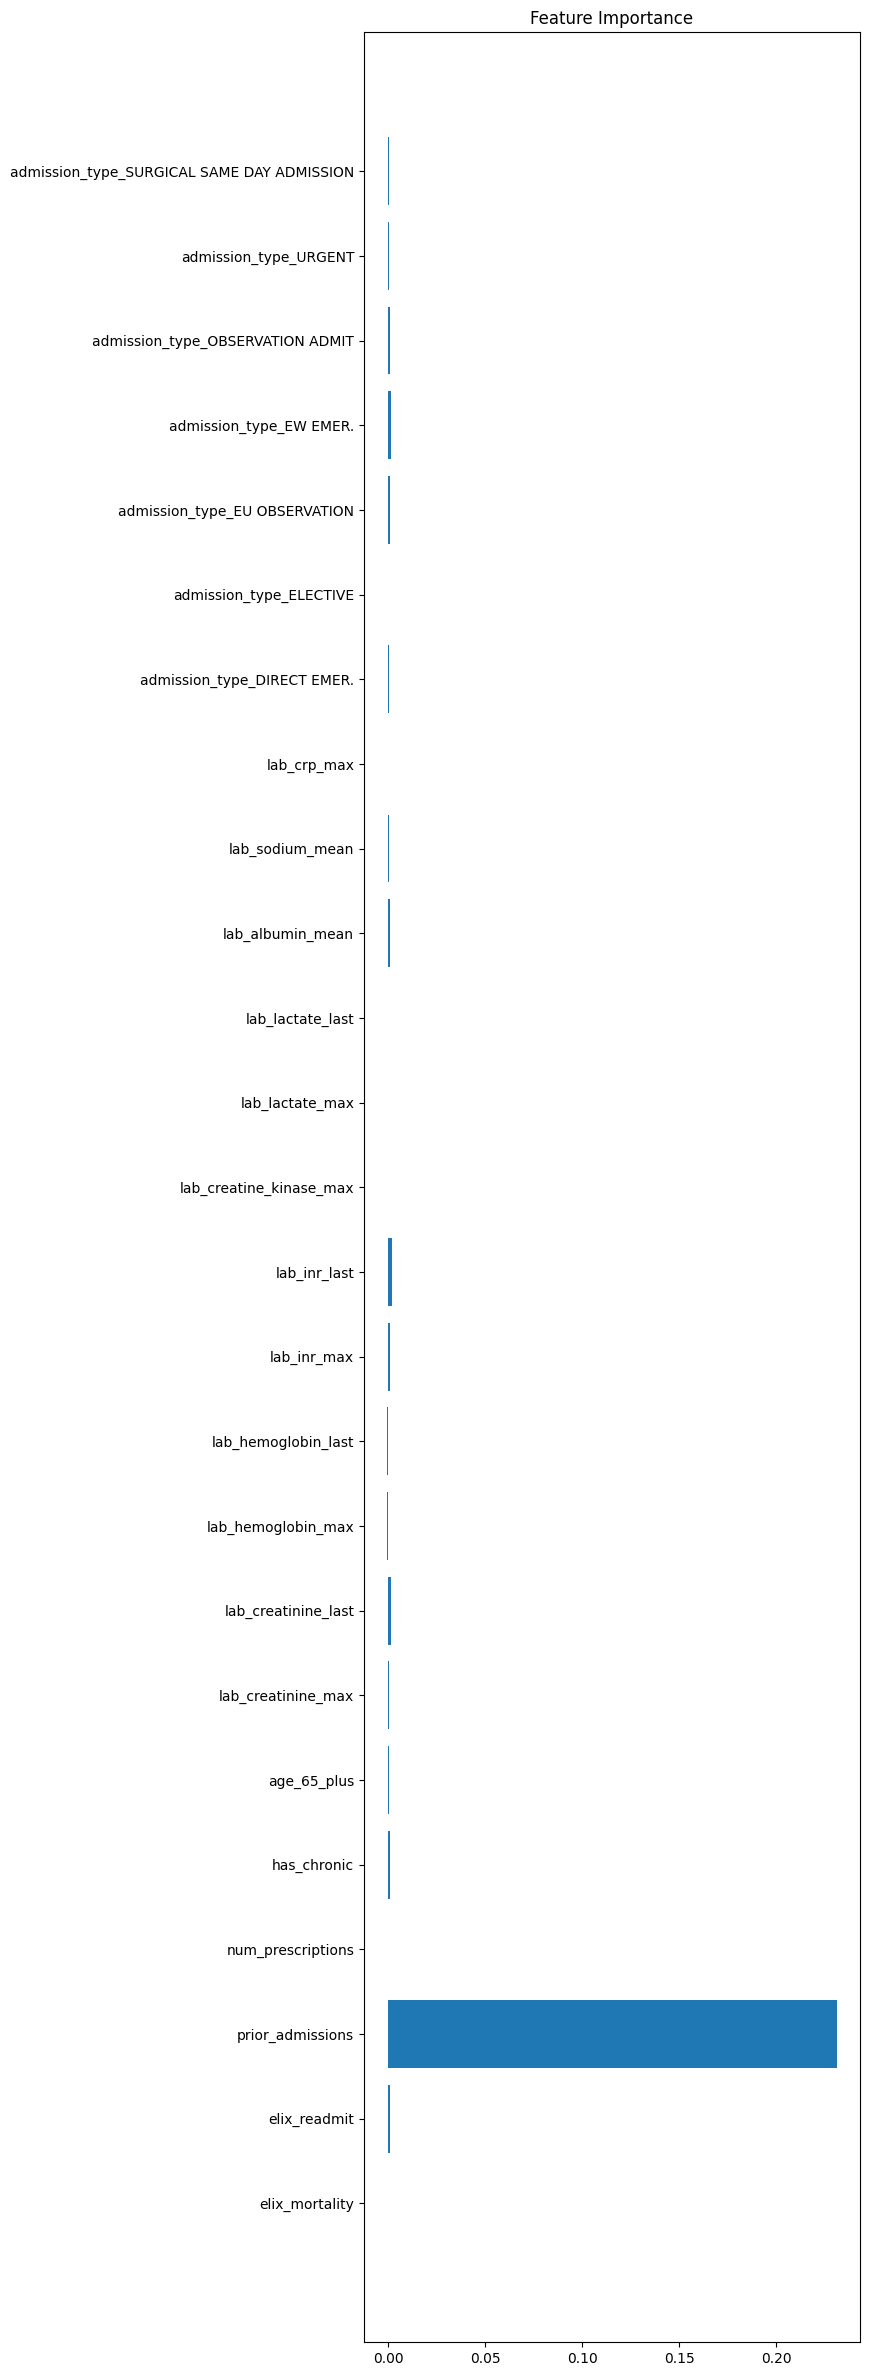

In [ ]:
import gc
from random import randint

import matplotlib.pyplot as plt
import cudf
import optuna
import pandas as pd
from cuml import RandomForestClassifier as cuRF
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix
from cuml.metrics import roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

# from mimic import get_mimic_iv_31
# from misc import prepare_data_split, objective, ToCuDFTransformer


def main():
    name = 'MIMIC-IV 3.1'
    print(f'Loading {name} data...')

    X = get_mimic_iv_31(
        data_path='/content/drive/MyDrive/Datasets',
        cache_path='/content/drive/MyDrive/Datasets/cache',
        time_delta_days=365.24
    )
    y = X.pop('readmit')

    # Initial split to simulate train/test
    print(f'Data loaded. Preparing data for training...')
    X_train, X_test, y_train, y_test = prepare_data_split(X, y)

    all_cols = X.columns
    del X, y
    gc.collect()
    current_context().deallocations.clear()

    # Only optimize on the training set
    print("Starting hyperparameter optimization with Optuna...")
    study = optuna.create_study(direction='minimize')

    study.optimize(
        lambda trial: objective(trial, X_train, y_train),
        n_trials=5,
        n_jobs=-1
    )

    print("Best parameters:", study.best_params)
    print("Best CV accuracy:", study.best_value)

    # Convert data to pandas explicitly for SMOTE compatibility
    X_train, y_train = compute_xy(X_train, y_train)
    X_test, y_test = compute_xy(X_test, y_test)

    # Final model with the best parameters
    best_model = cuRF(
        **study.best_params,
        random_state=randint(0, 1000),
        n_streams=1,
    )

    # Build pipeline with data conversion
    USE_SMOTE = True
    model_pipeline = Pipeline([
        (
            'smote', SMOTE(random_state=randint(0, 1000))
        ) if USE_SMOTE else ('passthrough', 'passthrough'),
        ('to_cudf', ToCuDFTransformer()),
        ('classifier', best_model)
    ], verbose=True)

    # Train
    model_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = model_pipeline.predict(X_test).to_numpy()

    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

    # https://github.com/rapidsai/cuml/issues/3531
    result = permutation_importance(
        model_pipeline.named_steps['classifier'],
        X_test.values,  # Requires CPU data
        y_test,
        n_repeats=5,
        random_state=42
    )

    importances = '\n'.join([
        f"{col}: {importance}"
        for col, importance
        in zip(all_cols, result.importances_mean)
    ])
    print(importances)

    plt.figure().set_figwidth(30)
    plt.figure().set_figheight(30)
    plt.barh(
        all_cols,
        result.importances_mean,
    )
    plt.title('Feature Importance')
    plt.show()


if __name__ == '__main__':
    main()